In [1]:
# notebook using Julia replicating the Python notebook for Make Your Own Neural Network
# working with the MNIST data set
#
# (c) Alex Glaser, 2017
# license is GPLv2

In [3]:
# open the CSV file and read its contents into a list
# Julia also has readcsv and readdlm (dlm stands for delimited) functions
data_file = open("mnist_dataset/mnist_train_100.csv", "r")
data_list = readlines(data_file)
close(data_file)
# You can also load data in directly using
# data_list = readlines("mnist_dataset/mnist_train_100.csv")

In [4]:
# check the number of data records (examples)
length(data_list)

100

In [5]:
# show the second dataset record, note that Julia (like R) starts counting from 1 not 0.
# the first number is the label, the rest are pixel colour values (greyscale 0-255)
data_list[2]

"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,159,253,159,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,252,237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,227,253,252,239,233,252,57,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,60,224,252,253,252,202,84,252,253,122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,163,252,252,252,253,252,252,96,189,253,167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,238,253,253,190,114,253,228,47,79,255,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,179,12,75,121,21,0,0,253,243,50,0,0,0,0,0,0,0,0,0,0,0,0,0,38,165,253,233,208,84,0,0,0,0,0,0,253,252,165,0,0,0,0,0,0,0,0,0,0,0,0,7,178,252,240,71,19,28,0,0,0,0,0,0,253,252,195,0,0,0,0,0,0,0,0,0,0,0,0,57,252,252,63,0,0,0,0,0,0,0,0,0,253,252,195,0,0,0,0,0,0,0,0,0,0,0,0,198,253,190,0,0,0,0,0,0,0,0,0,0,255,253,196

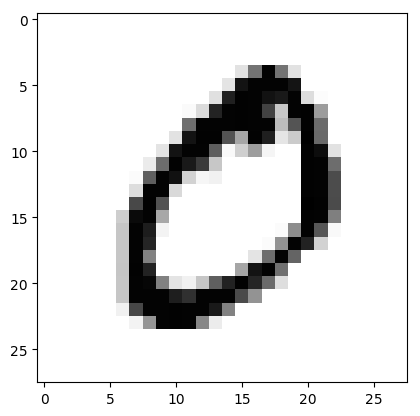

PyObject <matplotlib.image.AxesImage object at 0x31fd55cf8>

In [6]:
# take the data from a record, rearrange it into a 28*28 array and plot it as an image
interim = split(data_list[2], ",")
# to convert the variable 'interim' into integers create an initial array (or length 785) and use a for loop to convert
all_values = Array(Int64, 785)
for i in 1:785
    all_values[i] = parse(Float64, interim[i])
end
# from the following page
# http://stackoverflow.com/questions/33440857/julia-convert-numeric-string-to-float-or-int
# it was possible to convert a whole vector use the map function
# all_values = map(x->parse(Int64,x),interim)
# You can use Julia's reshape function to put the values into a 28 x 28 matrix, note that the 'slicing' follows 
# on from Python and R, except we now have a nice keyword 'end' to represent the last index of the array
image_array = reshape(all_values[2:end], 28, 28) #numpy.asfarray(all_values[1:]).reshape((28,28))
# We also have to transpose the image_array as reshape fills 'by column'.
image_array = transpose(image_array)
# For the plots we're going to use the PyPlot package as it call Python’s matplotlib directly from Julia.
# You'll need to run the following line to install it, which can be run directly from a Jupyter cell
# Pkg.add("PyPlot")
# Also, Julia has the keyword 'using' instead of import
using PyPlot
imshow(image_array, cmap="Greys", interpolation="None")

In [65]:
image_array

28×28 Array{Int64,2}:
 0  0  0  0  0  0   0    0    0    0  …    0    0    0    0  0  0  0  0  0
 0  0  0  0  0  0   0    0    0    0       0    0    0    0  0  0  0  0  0
 0  0  0  0  0  0   0    0    0    0       0    0    0    0  0  0  0  0  0
 0  0  0  0  0  0   0    0    0    0       0    0    0    0  0  0  0  0  0
 0  0  0  0  0  0   0    0    0    0      50    0    0    0  0  0  0  0  0
 0  0  0  0  0  0   0    0    0    0  …  237    0    0    0  0  0  0  0  0
 0  0  0  0  0  0   0    0    0    0     252   57    6    0  0  0  0  0  0
 0  0  0  0  0  0   0    0    0    0     252  253  122    0  0  0  0  0  0
 0  0  0  0  0  0   0    0    0    0     189  253  167    0  0  0  0  0  0
 0  0  0  0  0  0   0    0    0    0      79  255  168    0  0  0  0  0  0
 0  0  0  0  0  0   0    0    0   48  …    0  253  243   50  0  0  0  0  0
 0  0  0  0  0  0   0    0   38  165       0  253  252  165  0  0  0  0  0
 0  0  0  0  0  0   0    7  178  252       0  253  252  195  0  0  0  0  0
 ⋮ 

In [67]:
# scale input to range 0.01 to 1.00
scaled_input = (all_values[2:end] / 255.0 * 0.99) + 0.01
print(scaled_input)

[0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.208,0.627294,0.992235,0.627294,0.204118,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.196353,0.934,0.988353,0.988353,0.988353,0.930118,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.219647,0.891294,0.992235,0.988353,0.937882,0.914588,0.